In [ ]:
import hockey.hockey_env as h_env
from gymnasium import spaces
import numpy as np
import pylab as plt


  
from DQN_self import DQNAgent
from train import custom_actions
from evaluate import evaluate

## ***Evaluation***

[250. 250.  32. ...  52.  63.  55.]


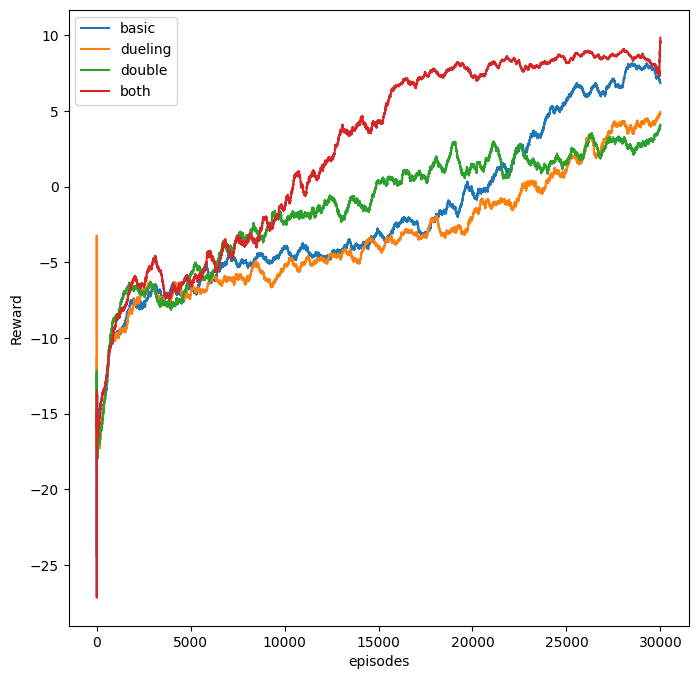

In [ ]:
basic_DQN = np.load("basic_stats.npy")
dueling_DQN = np.load("dueling_checkpoint_stats.npy")
double_DQN = np.load("double_checkpoint_stats.npy")
both_DQN = np.load("both_checkpoint_stats.npy")
print(both_DQN[:,2])

basic_reward = []
dueling_reward = []
double_reward = []
both_reward = []
episodes = 500
for i in range(len(basic_DQN)):
    if i < episodes:
        basic_reward.append(np.mean(basic_DQN[:i+1,1]))
        dueling_reward.append(np.mean(dueling_DQN[:i+1,1]))
        double_reward.append(np.mean(double_DQN[:i+1,1]))
        both_reward.append(np.mean(both_DQN[:i+1,1]))
    else:
        basic_reward.append(np.mean(basic_DQN[i-episodes+1:i+1, 1]))
        dueling_reward.append(np.mean(dueling_DQN[i-episodes+1:i+1, 1]))
        double_reward.append(np.mean(double_DQN[i-episodes+1:i+1, 1]))
        both_reward.append(np.mean(both_DQN[i-episodes+1:i+1, 1]))


plt.figure(figsize=(8,8))
plt.plot(basic_reward, label = "basic")
plt.plot(dueling_reward, label = "dueling")
plt.plot(double_reward, label = "double")
plt.plot(both_reward, label = "both")
plt.xlabel("episodes")
plt.ylabel("Reward")
plt.legend()
plt.savefig("DQN_Reward_Graph.png")


In [ ]:
env = h_env.HockeyEnv()
basic_opponent = h_env.BasicOpponent(weak=True)

obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()




1: Done after 170 steps. Reward: 8.984015591929266
21: Done after 67 steps. Reward: -11.383356283031734
41: Done after 45 steps. Reward: 9.45784589932373
61: Done after 26 steps. Reward: 9.379985989487892
81: Done after 115 steps. Reward: 9.15363020205771
101: Done after 25 steps. Reward: 9.108420138340925
121: Done after 42 steps. Reward: 9.457149899272183
141: Done after 21 steps. Reward: 9.642025434301491
161: Done after 41 steps. Reward: 9.326571795973958
181: Done after 44 steps. Reward: 9.245086629607139
201: Done after 150 steps. Reward: 6.1445902490956765
221: Done after 77 steps. Reward: 8.781140880914489
241: Done after 45 steps. Reward: 8.818511957875137
261: Done after 22 steps. Reward: 9.472259357387617
281: Done after 46 steps. Reward: 9.246136943498238
301: Done after 19 steps. Reward: 9.588168036294205
321: Done after 46 steps. Reward: 9.278908948978541
341: Done after 23 steps. Reward: 9.418164940824607
361: Done after 98 steps. Reward: 9.167056539373519
381: Done afte

In [3]:
env = h_env.HockeyEnv()
basic_agent = DQNAgent(
    observation_space=env.observation_space.shape[0], 
    action_space = spaces.Discrete(len(custom_actions)), 
    discount=0.99, 
    eps=0, 
    use_target_net=True,
    double = False,
    dueling = False,
)
basic_agent.load("basicDQN_weights.pt")


both_agent = DQNAgent(
    observation_space=env.observation_space.shape[0], 
    action_space = spaces.Discrete(len(custom_actions)), 
    discount=0.99, 
    eps=0, 
    use_target_net=True,
    double = True,
    dueling = True,
)
both_agent.load("both_weights.pt")

In [ ]:
stats_basic_weak, wins_basic_weak, losses_basic_weak, draws_basic_weak, timeouts_basic_weak = evaluate(
    basic_agent,
    max_episodes=1000,
    render_human=False,
    opponent_weak=True,
)
env.close()

print(wins_basic_weak, losses_basic_weak, draws_basic_weak, timeouts_basic_weak)

1: Done after 47 steps. Reward: 9.962516713947585
21: Done after 42 steps. Reward: 9.942461635591282
41: Done after 39 steps. Reward: 9.924017801197843
61: Done after 53 steps. Reward: 9.706664729638323
81: Done after 73 steps. Reward: 9.913183624263622
101: Done after 82 steps. Reward: 9.761847653176625
121: Done after 51 steps. Reward: 9.940605640504103
141: Done after 80 steps. Reward: 9.781872638088448
161: Done after 250 steps. Reward: -0.12898786296091175
181: Done after 49 steps. Reward: 9.946728473319485
201: Done after 87 steps. Reward: -11.683616991693246
221: Done after 138 steps. Reward: 7.052153130055714
241: Done after 57 steps. Reward: 9.905949780017012
261: Done after 77 steps. Reward: 9.718501436960722
281: Done after 64 steps. Reward: 9.80641459201693
301: Done after 37 steps. Reward: 9.905959312664585
321: Done after 133 steps. Reward: 8.610610802051722
341: Done after 157 steps. Reward: 9.302128625254404
361: Done after 54 steps. Reward: 9.953835408652626
381: Done 

In [ ]:
stats_basic_strong, wins_basic_strong, losses_basic_strong, draws_basic_strong, timeouts_basic_strong = evaluate(
    basic_agent,
    max_episodes=1000,
    render_human=False,
    opponent_weak=False,
)
env.close()

print(wins_basic_strong, losses_basic_strong, draws_basic_strong, timeouts_basic_strong)

1: Done after 35 steps. Reward: -11.654142598965628
21: Done after 250 steps. Reward: -14.614323185088665
41: Done after 250 steps. Reward: -1.9914384643874308
61: Done after 206 steps. Reward: 5.470293105521976
81: Done after 250 steps. Reward: -5.151709190099994
101: Done after 250 steps. Reward: -4.415085582652904
121: Done after 250 steps. Reward: -3.5695660733283847
141: Done after 106 steps. Reward: 8.01085570648931
161: Done after 233 steps. Reward: 2.2091730252442394
181: Done after 74 steps. Reward: -11.825682247912107
201: Done after 250 steps. Reward: -6.972882960933228
221: Done after 250 steps. Reward: -4.8471227085823845
241: Done after 250 steps. Reward: -2.8482088951649773
261: Done after 48 steps. Reward: -11.32174373779413
281: Done after 85 steps. Reward: -12.191095129554768
301: Done after 172 steps. Reward: 5.986595043926726
321: Done after 250 steps. Reward: -1.237923969357917
341: Done after 240 steps. Reward: -15.679592848546863
361: Done after 38 steps. Reward:

In [ ]:
stats_both_weak, wins_both_weak, losses_both_weak, draws_both_weak, timeouts_both_weak = evaluate(
    both_agent,
    max_episodes=1000,
    render_human=False,
    opponent_weak=True,
)
env.close()

print(wins_both_weak, losses_both_weak, draws_both_weak, timeouts_both_weak)

1: Done after 47 steps. Reward: 9.947188799262662
21: Done after 55 steps. Reward: 9.875449369622892
41: Done after 46 steps. Reward: 9.917069876534965
61: Done after 49 steps. Reward: 9.893816397292555
81: Done after 52 steps. Reward: 9.85142759891175
101: Done after 64 steps. Reward: 9.921713949357654
121: Done after 71 steps. Reward: 9.954372799808349
141: Done after 69 steps. Reward: 9.887453115331427
161: Done after 250 steps. Reward: -3.041555420257049
181: Done after 73 steps. Reward: 9.900368517660068
201: Done after 45 steps. Reward: 9.82348442105075
221: Done after 49 steps. Reward: 9.950043579224857
241: Done after 47 steps. Reward: 9.954831301645749
261: Done after 46 steps. Reward: 9.89509748307056
281: Done after 67 steps. Reward: 9.871622979623073
301: Done after 51 steps. Reward: 9.835189380253146
321: Done after 49 steps. Reward: 9.83313972545482
341: Done after 65 steps. Reward: 9.868435325069665
361: Done after 50 steps. Reward: 9.975312689972254
381: Done after 187 

In [7]:
stats_both_strong, wins_both_strong, losses_both_strong, draws_both_strong, timeouts_both_strong = evaluate(
    both_agent,
    max_episodes=1000,
    render_human=False,
    opponent_weak=False,
)
env.close()

print(wins_both_strong, losses_both_strong, draws_both_strong, timeouts_both_strong)

1: Done after 250 steps. Reward: -4.301414563029614
21: Done after 171 steps. Reward: 6.180819855088707
41: Done after 65 steps. Reward: 9.87577418883355
61: Done after 250 steps. Reward: -5.1670989742692
81: Done after 213 steps. Reward: 7.6924302445955
101: Done after 40 steps. Reward: -12.216836470949882
121: Done after 250 steps. Reward: -3.605219322687669
141: Done after 180 steps. Reward: 7.373842809427957
161: Done after 46 steps. Reward: -11.447800119640211
181: Done after 250 steps. Reward: -4.94840445068943
201: Done after 58 steps. Reward: 9.137396409439257
221: Done after 109 steps. Reward: -12.65200360709492
241: Done after 250 steps. Reward: -4.670052478485034
261: Done after 250 steps. Reward: -5.375427810932772
281: Done after 94 steps. Reward: 9.383882151058968
301: Done after 28 steps. Reward: -11.062002377599756
321: Done after 250 steps. Reward: -1.25406430657225
341: Done after 66 steps. Reward: -13.163633197223643
361: Done after 94 steps. Reward: -12.534827260652